In [61]:
import json, os
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

os.chdir('/home/zackb/Synapse/ml_myo/')
with open('full_raw_dataset/pose_instant_data.json') as poses:
    poses_json = json.load(poses)
    print(poses_json.keys())


dict_keys(['Rest', 'Hand_close', 'Hand_open', 'Wrist_extension', 'Wrist_flexion', 'None'])


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Add number label vectors
target = []; df_poses = []
total_features = 0; label =0
for key in poses_json:
    if key != 'None':
        for i in range(len(poses_json[key])):
            target.append(label)
        for vec in poses_json[key]:
            df_poses.append(vec)
        total_features += len(poses_json[key])
    print(key+' :'+str(label)+ " || size = "+ str(len(poses_json[key])))
    label+=1
   

#Normalize data scale for faster convergence and overall better results
scaler = StandardScaler()
df_normalize_poses = scaler.fit_transform(df_poses)
#Side note! It helped A LOT.
    
#split test/trainning data
X_train, X_test, y_train, y_test = \
        train_test_split(df_normalize_poses, target, test_size=0.27, random_state=42)

Rest :0 || size = 2139
Hand_close :1 || size = 1959
Hand_open :2 || size = 2200
Wrist_extension :3 || size = 2522
Wrist_flexion :4 || size = 2457
None :5 || size = 268


In [56]:
#Multiclass classifier using the one vs all method and SVM or linear SVM
ova_MultC_model = OneVsRestClassifier(LinearSVC(max_iter=2000))
#rbf kernel. Little difference in results
#ova_MultC_model = OneVsRestClassifier(SVC(C=100, gamma=0.001))
ova_MultC_model.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=None)

[[2062   15   29   31    2]
 [  22 1928    2    6    1]
 [  57   15 1966  161    1]
 [ 161    0   80 2281    0]
 [   2    1    0    0 2454]]

              precision    recall  f1-score   support

           0       0.89      0.96      0.93      2139
           1       0.98      0.98      0.98      1959
           2       0.95      0.89      0.92      2200
           3       0.92      0.90      0.91      2522
           4       1.00      1.00      1.00      2457

   micro avg       0.95      0.95      0.95     11277
   macro avg       0.95      0.95      0.95     11277
weighted avg       0.95      0.95      0.95     11277



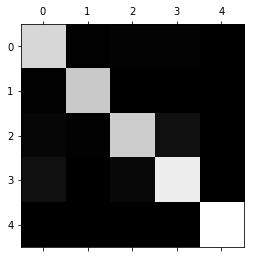

In [97]:
from matplotlib.pyplot import matshow, cm
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

predictions = ova_MultC_model.predict(df_normalize_poses)
conf_mx = confusion_matrix(target, predictions)
#predictions = ova_MultC_model.predict(X_test)
#conf_mx = confusion_matrix(y_test, predictions)
print(conf_mx)
print()
#print(classification_report(y_test, predictions))
print(classification_report(target, predictions))
matshow(conf_mx, cmap=cm.gray)

In [101]:
#Recreation of the predict function Noooooo
rest_array = np.array(df_normalize_poses)
rest_coef = np.array([-0.50177939, -0.12312242, -0.58211691, -1.13062519, -0.05278639,
       -0.58220767, -0.26277762, -0.30333716])
intercept = -2.39834662154433
in_counter = 0; out_counter =0
for sample in rest_array:
    if (np.dot(sample, rest_coef) + intercept) > 0:
        in_counter += 1
    else:
        out_counter +=1
        
print(in_counter)
print(out_counter)

2159
9118


In [58]:
scaler.mean_

array([15.27278823, 20.61739096, 26.63235968, 29.25870425, 22.88020618,
       10.74633017, 15.01194675, 12.44157631])

In [59]:
scaler.scale_

array([15.85038121, 18.33252677, 20.01025644, 22.94854805, 18.76962492,
        9.90608964, 20.21452028, 15.04835818])

In [60]:
from pprint import pprint
label=0
for clf in ova_MultC_model.estimators_:
    pprint("Label= " + str(label))
    pprint(clf.coef_[0])
    pprint(clf.intercept_[0])
    label+=1
    print()

'Label= 0'
array([-0.50177939, -0.12312242, -0.58211691, -1.13062519, -0.05278639,
       -0.58220767, -0.26277762, -0.30333716])
-2.39834662154433

'Label= 1'
array([ 0.7171872 ,  0.79855248,  1.59690495, -1.12807589,  0.01190339,
       -0.14928984, -5.32807562, -0.09335211])
-3.1454536105057107

'Label= 2'
array([ 0.50595327,  0.12428759, -0.50990989,  1.04564589, -0.21602766,
       -0.63562551, -0.04528633, -0.12135247])
-0.9394781267760751

'Label= 3'
array([-7.96583056, -0.34874734,  0.44085647,  0.5310395 ,  0.1033079 ,
        1.71613596, -1.3568254 ,  1.80795963])
-5.125387299767228

'Label= 4'
array([-0.80089072,  0.77656701, -0.00487264,  0.26667746, -0.76825741,
       -0.32323672,  3.40921776,  0.26941982])
-1.0643582487535055

